In [1]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

c:\Users\Shlomi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define sobel kernels

In [2]:
positive_X_sobel = torch.tensor([[1, 0, -1],
                                 [2, 0, -2],
                                 [1, 0, -1]])

negative_X_sobel = torch.tensor([[-1, 0, 1],
                                 [-2, 0, 2],
                                 [-1, 0, 1]])

negative_Y_sobel = torch.tensor([[1, 2, 1],
                                 [0, 0, 0],
                                 [-1, -2, -1]])

positive_Y_sobel = torch.tensor([[-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]])

# Get sample image from Fashion MINST

In [3]:
train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True,
    transform=torchvision.transforms.ToTensor())

train_dataloader = DataLoader(
    train_data_transformed, batch_size=1)
img, _ = next(iter(train_dataloader))

# Regular conv

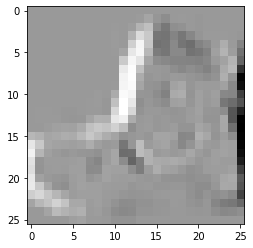

In [4]:

myConvLayer = torch.nn.Conv2d(1, 1, (3,3))

myConvLayer.weight=nn.Parameter(positive_X_sobel.reshape(1,1,3,3).float(), requires_grad=False)

img2= myConvLayer(img.reshape(1,28,28))
plt.imshow(img2.detach().squeeze(),cmap='Greys')

# Padding

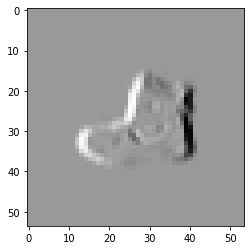

In [5]:

myConvLayer = torch.nn.Conv2d(1, 1, (3,3), padding=14)
myConvLayer.weight=nn.Parameter(positive_X_sobel.reshape(1,1,3,3).float(), requires_grad=False)

img2= myConvLayer(img.reshape(1,28,28))
plt.imshow(img2.detach().squeeze(),cmap='Greys')

# Stride

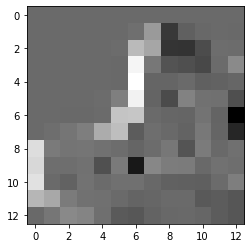

In [6]:
myConvLayer = torch.nn.Conv2d(1, 1, (3,3), stride=2)
myConvLayer.weight=nn.Parameter(positive_X_sobel.reshape(1,1,3,3).float(), requires_grad=False)

img2= myConvLayer(img.reshape(1,28,28))
plt.imshow(img2.detach().squeeze(),cmap='Greys')